___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [57]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (6,4)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [4]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
print("There are", len(X_train), "images in the training dataset.")
print("There are", len(X_test), "images in the test dataset.")

There are 60000 images in the training dataset.
There are 10000 images in the test dataset.


In [ ]:
X_train[0]

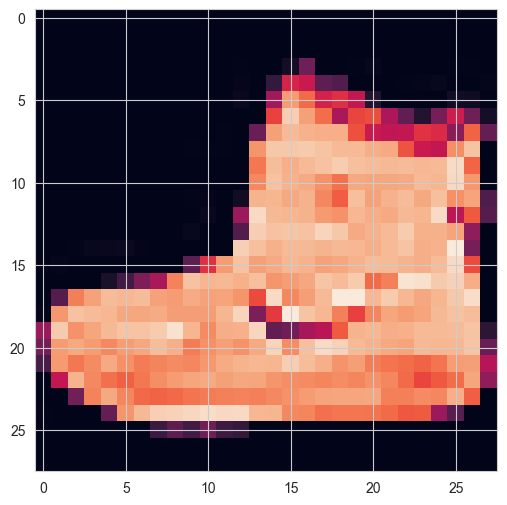

In [7]:
plt.imshow(X_train[0])

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [9]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [11]:
classes[y_train[6]]

'Sneaker'

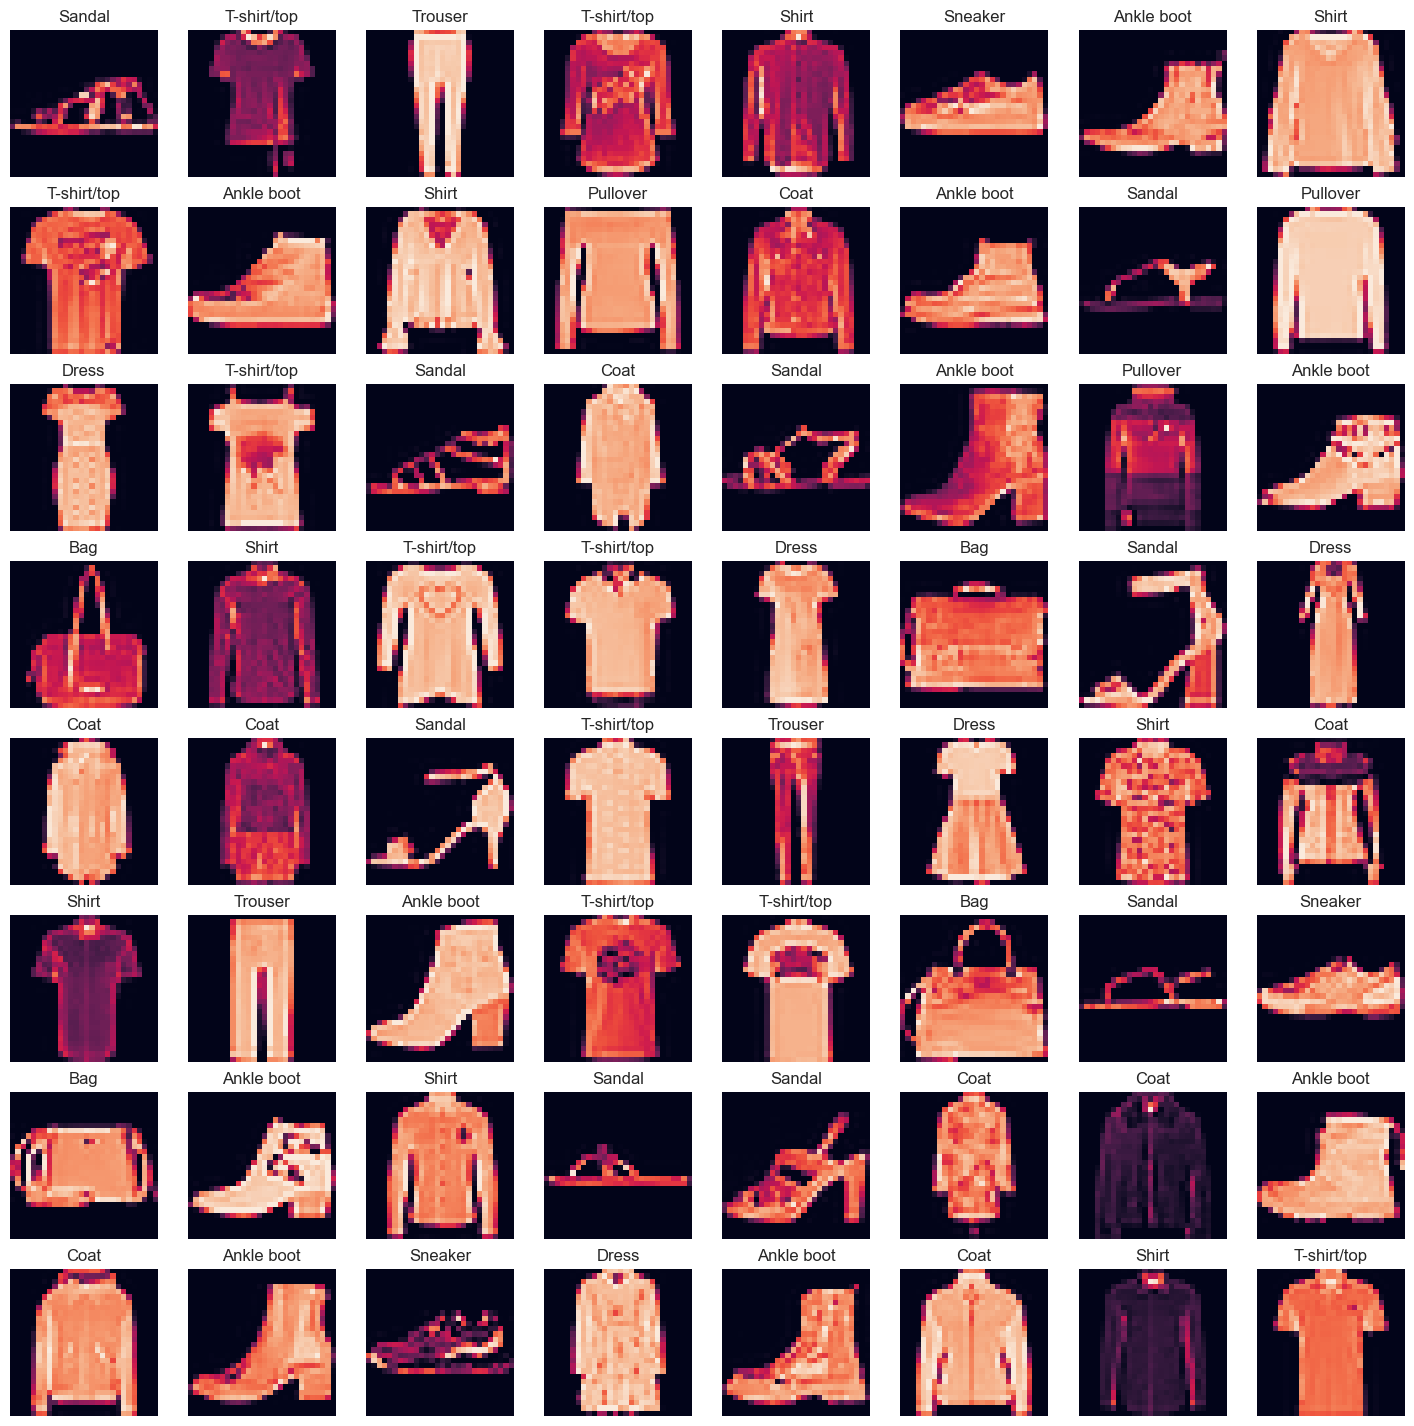

In [12]:
plt.figure(figsize=(18,18))
for i in range(64):
  rand_index = int(np.random.randint(low=0, high=60000, size=1)) 
  plt.subplot(8,8,i+1)
  plt.axis("off")
  plt.title(classes[int(y_train[rand_index])])
  plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [14]:
X_train[0].max()

255

In [15]:
X_train[0].min()

0

In [17]:
# Normalize image pixels

X_train = X_train.astype("float")
X_test = X_test.astype("float")

X_train /= 255
X_test /= 255

In [18]:
X_train[0].max()

1.0

In [19]:
X_train[0].min()

0.0

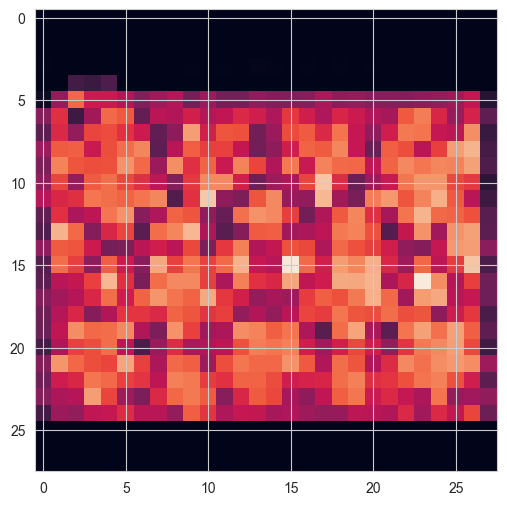

In [21]:
plt.imshow(X_train[23]);

In [22]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [24]:
pd.DataFrame(y_train).value_counts()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [ ]:
#sns.scatterplot(x, y) buraya tekrar bak.

In [25]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [26]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [27]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [28]:
from tensorflow.keras.utils import to_categorical

In [29]:
# gözlem hangi kategoride ise o indexteki değeri 1 diğerlerini 0 yapar.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [32]:
y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [40]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 17500)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2240128   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,241,698
Trainable params: 2,241,698
Non-trainable params: 0
____________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
earlystop = EarlyStopping(monitor="val_accuracy", mode="max", patience=2, restore_best_weights=True)

In [44]:
model.fit(X_train, y_train,
          batch_size=64,
          epochs=10,
          validation_data=[X_test, y_test],
          callbacks=[earlystop]

        )

Epoch 1/10
938/938 [==============================] - 72s 75ms/step - loss: 0.3908 - accuracy: 0.8604 - val_loss: 0.3020 - val_accuracy: 0.8909
Epoch 2/10
938/938 [==============================] - 79s 84ms/step - loss: 0.2509 - accuracy: 0.9092 - val_loss: 0.2763 - val_accuracy: 0.9031
Epoch 3/10
938/938 [==============================] - 69s 74ms/step - loss: 0.2073 - accuracy: 0.9245 - val_loss: 0.2520 - val_accuracy: 0.9123
Epoch 4/10
938/938 [==============================] - 69s 74ms/step - loss: 0.1768 - accuracy: 0.9363 - val_loss: 0.2567 - val_accuracy: 0.9165
Epoch 5/10
938/938 [==============================] - 72s 76ms/step - loss: 0.1506 - accuracy: 0.9447 - val_loss: 0.2705 - val_accuracy: 0.9126
Epoch 6/10
938/938 [==============================] - 73s 78ms/step - loss: 0.1307 - accuracy: 0.9529 - val_loss: 0.2993 - val_accuracy: 0.9066


**TASK 7: Plot values of metrics you used in your model.**

In [50]:
model.history.history

{'loss': [0.39077767729759216,
  0.2509465515613556,
  0.20732340216636658,
  0.17680422961711884,
  0.15063336491584778,
  0.1306629180908203],
 'accuracy': [0.8603666424751282,
  0.9091833233833313,
  0.9244833588600159,
  0.9363499879837036,
  0.9447333216667175,
  0.9528999924659729],
 'val_loss': [0.3020104765892029,
  0.2762525975704193,
  0.2519627809524536,
  0.25666776299476624,
  0.2705134153366089,
  0.2992919981479645],
 'val_accuracy': [0.8909000158309937,
  0.9031000137329102,
  0.9122999906539917,
  0.9164999723434448,
  0.9125999808311462,
  0.9065999984741211]}

In [46]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,0.391,0.860,0.302,0.891
1,0.251,0.909,0.276,0.903
2,0.207,0.924,0.252,0.912
3,0.177,0.936,0.257,0.916
4,0.151,0.945,0.271,0.913
5,0.131,0.953,0.299,0.907


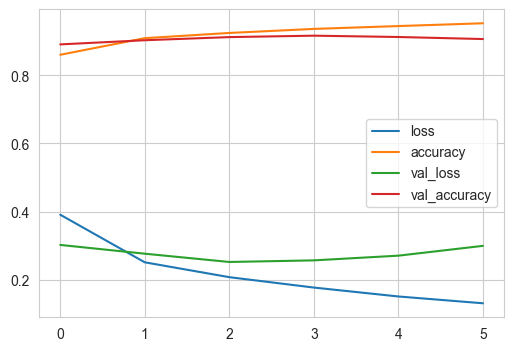

In [59]:
summary.plot();


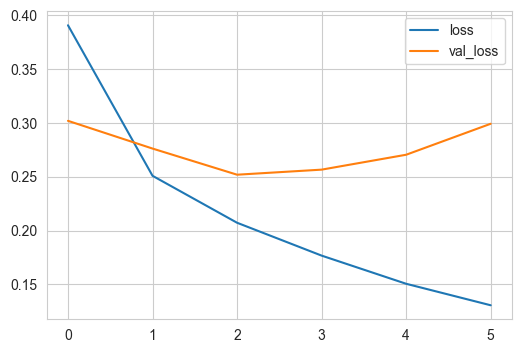

In [63]:
summary[["loss", "val_loss"]].plot();

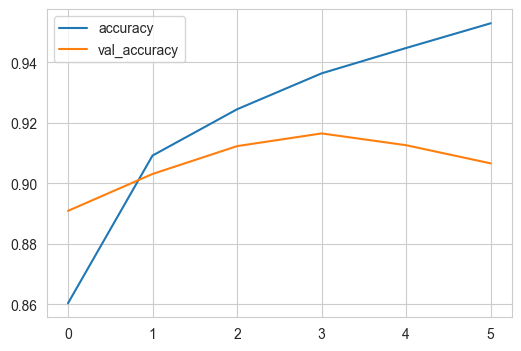

In [64]:
summary[["accuracy","val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [65]:
from sklearn.metrics import classification_report, confusion_matrix

In [67]:
score = model.evaluate(X_test, y_test)
score

313/313 [==============================] - 3s 9ms/step - loss: 0.2567 - accuracy: 0.9165


[0.2566677927970886, 0.9164999723434448]

In [68]:
print("Test loss: ", score[0])
print("Test accuracy", score[1])


Test loss:  0.2566677927970886
Test accuracy 0.9164999723434448


In [69]:
pred_proba = model.predict(X_test)
pred_proba

313/313 [==============================] - 3s 9ms/step


array([[1.8700799e-06, 2.7329636e-09, 1.3547533e-06, ..., 3.7488956e-03,
        1.3114506e-05, 9.9513584e-01],
       [1.3105600e-07, 5.3482409e-14, 9.9998844e-01, ..., 5.5487489e-13,
        1.6681900e-12, 1.8385482e-11],
       [3.9005128e-09, 1.0000000e+00, 8.7754755e-11, ..., 4.5944250e-18,
        7.8628277e-13, 3.2067404e-18],
       ...,
       [2.3332070e-08, 3.5423907e-13, 3.8077683e-08, ..., 1.5196418e-10,
        9.9999976e-01, 3.1066685e-14],
       [1.2232538e-09, 9.9999988e-01, 1.2623538e-09, ..., 3.5995465e-14,
        1.5309536e-13, 4.4683097e-13],
       [7.8028650e-04, 1.0330129e-05, 6.7351141e-04, ..., 2.8076369e-02,
        6.4063901e-03, 1.6912918e-03]], dtype=float32)

In [70]:
pred_proba.shape

(10000, 10)

In [71]:
pred_proba[0]

array([1.8700799e-06, 2.7329636e-09, 1.3547533e-06, 6.7866748e-09,
       2.0202199e-07, 1.0974209e-03, 1.1907557e-06, 3.7488956e-03,
       1.3114506e-05, 9.9513584e-01], dtype=float32)

In [72]:
np.argmax(pred_proba[0])

9

In [73]:
y_pred = np.argmax(pred_proba, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [74]:
y_pred.shape

(10000,)

In [75]:
y_test_arg=np.argmax(y_test,axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, y_pred))

Confusion Matrix
[[893   1  20  10   5   1  65   0   5   0]
 [  0 977   4  15   2   0   2   0   0   0]
 [ 16   0 855   8  74   1  46   0   0   0]
 [ 11   4  15 926  27   0  17   0   0   0]
 [  0   1  36  21 902   0  39   0   1   0]
 [  0   0   0   0   0 988   0   7   0   5]
 [126   0  58  25  66   0 718   0   7   0]
 [  0   0   0   0   0   9   0 982   1   8]
 [  1   1   5   4   2   2   3   1 981   0]
 [  1   0   0   0   0   9   0  47   0 943]]


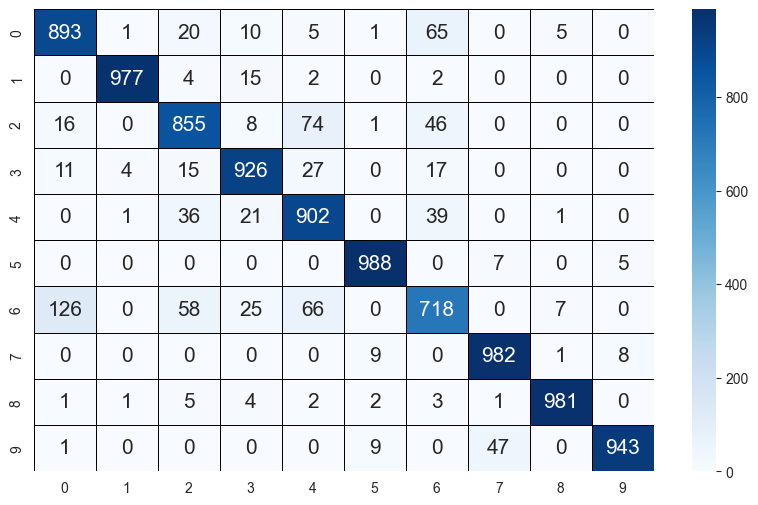

In [78]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test_arg, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15});

In [79]:
print(classification_report(y_test_arg, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1000
           1       0.99      0.98      0.98      1000
           2       0.86      0.85      0.86      1000
           3       0.92      0.93      0.92      1000
           4       0.84      0.90      0.87      1000
           5       0.98      0.99      0.98      1000
           6       0.81      0.72      0.76      1000
           7       0.95      0.98      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.99      0.94      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [80]:
(y_test_arg != y_pred).sum()

835

In [92]:
model.save("cnn_clothes_classification.h5")

## Prediction

In [93]:
clothes = X_test[40]

In [94]:
clothes.shape

(28, 28, 1)

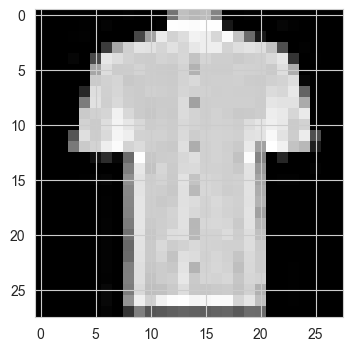

In [97]:
plt.imshow(clothes.reshape(28, 28), cmap="gray");

In [98]:
pred_prob = model.predict(clothes.reshape(1,28,28,1))
pred_prob

1/1 [==============================] - 0s 46ms/step


array([[8.9786530e-01, 4.9949534e-08, 9.0096422e-05, 2.4635374e-06,
        7.6674216e-05, 4.1848769e-09, 1.0195746e-01, 1.9835545e-07,
        7.7549066e-06, 7.1135467e-08]], dtype=float32)

In [99]:
# shape --> (num_images,width,height,color_channels)
y_pred = np.argmax(pred_prob)
y_pred

0

### Using

In [101]:
import tensorflow as tf

In [102]:
model = tf.keras.models.load_model("cnn_clothes_classification.h5")

In [103]:
pred = model.predict(np.expand_dims(X_test[15], axis=0))

1/1 [==============================] - 0s 130ms/step


In [104]:
np.argmax(pred)

1

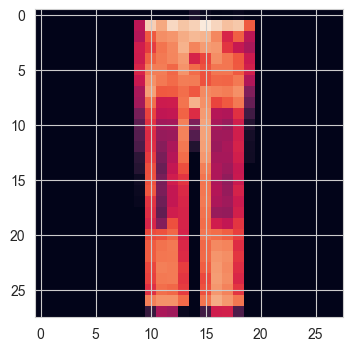

In [106]:
plt.imshow(X_test[15].reshape(28,28));

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___